In [1]:
# %load_ext autoreload
# %autoreload 2
from gpflow_bo import GPFOptBatchOne
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit import rdBase
rdBase.DisableLog('rdApp.error')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [9]:
import rdkit, scipy, sklearn, sys, gpflowopt, tensorflow
for module in [rdkit, scipy, pd, sklearn, tensorflow]:
    print('{:>12}:{:>10}'.format(module.__name__, module.__version__))
print(sys.version)

       rdkit: 2018.03.3
       scipy:     1.1.0
      pandas:    0.23.4
     sklearn:    0.19.1
  tensorflow:    1.10.0
3.5.5 |Anaconda, Inc.| (default, May 13 2018, 21:12:35) 
[GCC 7.2.0]


In [10]:
# Initialise 
oracle_model_file = None
oracle_data_file = 'data/mNaCT.csv'
latent_model_file = '/home/DeepLearning/cddd/default_model/' # location of cddd model
prefix = 'pre'
max_iter = 5
init_size = 235
acq_type = 'EI'
kappa = 2.0
comments = 'temporal'
val_field = 'mNaCT pIC50'
smi_field = 'SMILES'
id_field = 'ID'

In [11]:
new_opt = GPFOptBatchOne(oracle_model_file, oracle_data_file, latent_model_file, init_size=init_size,
                         id_field=id_field, val_field=val_field, smi_field=smi_field,
                         sampler='temp', index=[0, 1, 2, 3], thres=8.0, use_gpu=True,
                         acq_type=acq_type, kappa=kappa, 
                     rand_seed=123, #None, 
                     zero=0.0)

Oracle data loaded
Latent space model loaded
True
using gpu...
INFO:tensorflow:Restoring parameters from /home/DeepLearning/cddd/default_model/model.ckpt


In [12]:
timer = 0
smis = {}
while len(smis) < 10 and timer < 20:
    smi, ex, std = new_opt.suggest(1,
                               sampling='neighbors',
                               unique=False, 
                           timer=10, max_dist=8, test=1)
    if len(smi) > 0:
        smis[smi] = [ex, std]
        print(smi, ex)
    new_opt.rand_seed += 1
    timer += 1

INFO:tensorflow:Restoring parameters from /home/DeepLearning/cddd/default_model/model.ckpt
INFO:tensorflow:Restoring parameters from /home/DeepLearning/cddd/default_model/model.ckpt
COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(C)C)cc1F)CC2 8.817734889850996
INFO:tensorflow:Restoring parameters from /home/DeepLearning/cddd/default_model/model.ckpt
COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC)c(C#N)c1)CC2 8.789757438254389
INFO:tensorflow:Restoring parameters from /home/DeepLearning/cddd/default_model/model.ckpt
COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1c(F)cc(OC)cc1F)CC2 8.815178191994443
INFO:tensorflow:Restoring parameters from /home/DeepLearning/cddd/default_model/model.ckpt
COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(C)C)cc1F)CC2 8.806028825384008
INFO:tensorflow:Restoring parameters from /home/DeepLearning/cddd/default_model/model.ckpt
INFO:tensorflow:Restoring parameters from /home/DeepLearning/cddd/default_model/model.ckpt
COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(C)C)cc1F)CC2 8.805413471194402
INFO:tensorflow:Restoring par

In [13]:
smis

{'COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(C)C)cc1F)CC2': [8.770660139312854,
  0.22034728085292621],
 'COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC)c(C#N)c1)CC2': [8.789757438254389,
  0.23038743208562878],
 'COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1c(F)cc(OC)cc1F)CC2': [8.815178191994443,
  0.22826079452985182],
 'CC(=O)N1CCc2c1csc2C#N': [8.58644126371607, 0.23385787803042266],
 'CCc1ccc(C=CC([O-])=C(C(=O)OC)[P+](=O)CC)o1': [8.600350400531848,
  0.23163940285346901],
 'COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(F)F)cc1C)CC2': [8.798080051807766,
  0.22587181136323195],
 'COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(C)C)cc1F)C2': [8.843992852560477,
  0.22045486736006123]}

In [18]:
df = pd.DataFrame.from_dict(smis, orient='index', columns=['E[X]', 'std']).reset_index()

In [19]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='index', molCol='mol')

## Generated molecules with predicted potency

,index,E[X],std,mol
3,COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(C)C)cc1F)C2,8.84,0.22,
2,COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1c(F)cc(OC)cc1F)CC2,8.82,0.228,
6,COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(F)F)cc1C)CC2,8.8,0.226,
4,COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC)c(C#N)c1)CC2,8.79,0.23,
0,COCCNc1nc(Cl)c(C#N)c2c1CN(Cc1ccc(OC(C)C)cc1F)CC2,8.77,0.22,
5,CCc1ccc(C=CC([O-])=C(C(=O)OC)[P+](=O)CC)o1,8.6,0.232,
1,CC(=O)N1CCc2c1csc2C#N,8.59,0.234,

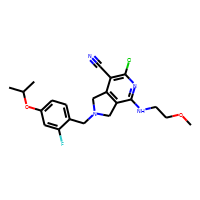
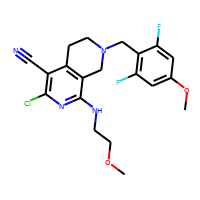
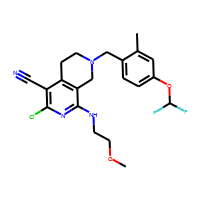
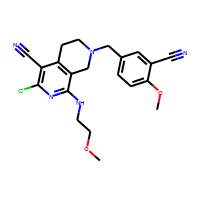
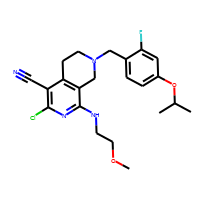
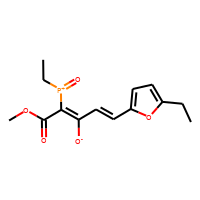
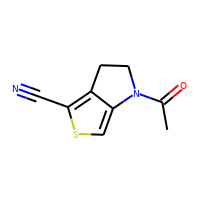

In [24]:
df_view = df.sort_values('E[X]', ascending=False).head(10)
df_view.style.set_precision(3)

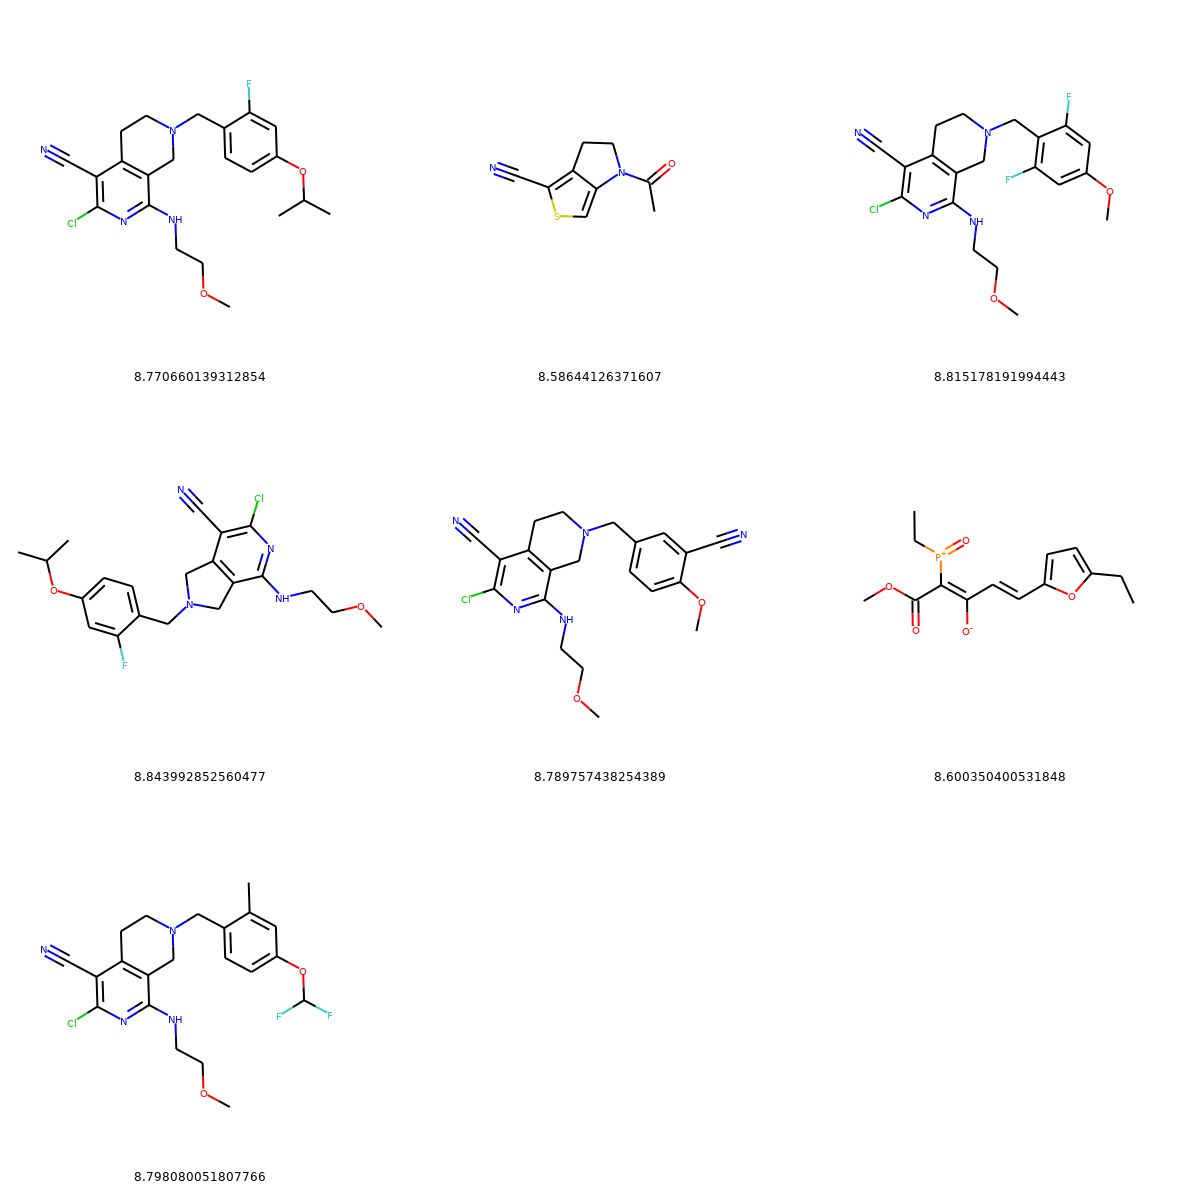

In [27]:
PandasTools.FrameToGridImage(df, column='mol', legendsCol='E[X]', molsPerRow=3, subImgSize=(400, 400))